<a href="https://colab.research.google.com/github/MarionM2/AI/blob/main/AI_in_Sports_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 1: Data preparation & feature extraction process**


---



#### **Loading players_21 and players_22 dataset.**

_players_21 is used for creating and training the model (step 1 to 4)_

_players_22 is used for testing the model (step 5)_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# set to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# load players_21 dataset
data_21 = pd.read_csv("/content/drive/MyDrive/Dataset/archive (7)/players_21.csv")

# load players_22 dataset
data_22 = pd.read_csv('/content/drive/MyDrive/Dataset/archive (7)/players_22.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### **Understanding the dataset**

Viewing the number of rows and columns, checking the type of data in each column and viewing the dataset contents to understand how the data in each column currently looks like.

In [ ]:
# number of rows and number of columns in the dataset
data_21.shape

(18944, 110)

In [ ]:
# the data type of each column
data_21.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 110 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    sofifa_id                    18944 non-null  int64  
 1    player_url                   18944 non-null  object 
 2    short_name                   18944 non-null  object 
 3    long_name                    18944 non-null  object 
 4    player_positions             18944 non-null  object 
 5    overall                      18944 non-null  int64  
 6    potential                    18944 non-null  int64  
 7    value_eur                    18707 non-null  float64
 8    wage_eur                     18719 non-null  float64
 9    age                          18944 non-null  int64  
 10   dob                          18944 non-null  object 
 11   height_cm                    18944 non-null  int64  
 12   weight_kg                    18944 non-null  int64  
 13  

In [ ]:
# the first 5 rows of the dataset
data_21.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,CAM,10.0,NaN,2004-07-01,2021.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,1985-02-05,187,83,45.0,Juventus,Italian Serie A,1.0,LS,7.0,NaN,2018-07-10,2022.0,38,Portugal,1354.0,LS,7.0,Right,4,5,5,High/Low,Unique,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,NaN,91+1,91+1,91+1,89,91,91,91,89,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,1988-08-21,184,80,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,NaN,NaN,NaN,Right,4,4,4,High/Medium,Unique,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,NaN,89+2,89+2,89+2,85,87,87,87,85,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar 

#### **Data munging, encoding, scaling, feature importance**

#### Step 1: Dropping columns that do not relate to the model.

In [ ]:
# function to drop columns that are clearly irrelevant to the model upon observation
def drop_cols(dataset):
  dataset = dataset.drop(['player_url','short_name', 'dob', 'club_jersey_number', 'club_loaned_from', 'nation_position', 'nation_jersey_number', 'real_face', 'player_tags', 'player_traits', 'nation_flag_url', 'player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'], axis=1)
  return dataset

In [ ]:
# drop columns 
data_21 = drop_cols(data_21)

In [ ]:
# columns remaining in the dataset
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    18944 non-null  int64  
 1   long_name                    18944 non-null  object 
 2   player_positions             18944 non-null  object 
 3   overall                      18944 non-null  int64  
 4   potential                    18944 non-null  int64  
 5   value_eur                    18707 non-null  float64
 6   wage_eur                     18719 non-null  float64
 7   age                          18944 non-null  int64  
 8   height_cm                    18944 non-null  int64  
 9   weight_kg                    18944 non-null  int64  
 10  club_team_id                 18719 non-null  float64
 11  club_name                    18719 non-null  object 
 12  league_name                  18719 non-null  object 
 13  league_level    

#### Step 2: Filling in missing values using SimpleImputer.

In [ ]:
# function to fill in missing values
def input_missing_values(dataset):

  # select all columns with empty cells
  cols_with_null = dataset.columns[dataset.isnull().any()]

  # Create a SimpleImputer object with the strategy of most frequent value to fill in non-numerical data
  imputer = SimpleImputer(strategy='most_frequent')

  # Create a SimpleImputer object with the strategy of median value to fill in numerical data
  imputer_num = SimpleImputer(strategy='median')

  for col in cols_with_null:
    if dataset[col].dtypes == np.int64 or dataset[col].dtypes == np.float64:
      # Encode the null values in each non numerical column with the most frequent value
      dataset[col] = imputer_num.fit_transform(dataset[[col]])
    else:
      # Encode the null values in each numerical column with the median value
      dataset[col] = imputer.fit_transform(dataset[[col]])

  return dataset

In [ ]:
# fill in missing values 
data_21 = input_missing_values(data_21)

In [ ]:
# Print the updated dataframe
data_21.head()

,sofifa_id,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,170,72,241.0,FC Barcelona,Spain Primera Division,1.0,CAM,2004-07-01,2021.0,52,Argentina,1369.0,Left,4,4,5,Medium/Low,Unique,138400000.0,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,37.0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,20801,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,187,83,45.0,Juventus,Italian Serie A,1.0,LS,2018-07-10,2022.0,38,Portugal,1354.0,Right,4,5,5,High/Low,Unique,75900000.0,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,37.0,91+1,91+1,91+1,89,91,91,91,89,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,188545,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,184,80,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,2014-07-01,2023.0,37,Poland,1367.0,Right,4,4,4,High/Medium,Unique,132000000.0,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,37.0,89+2,89+2,89+2,85,87,87,87,85,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,190871,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,2017-08-03,2022.0,54,Brazil,1367.0,Right,5,5,5,High/Medium,Unique,166500000.0,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,35,30,29,9,9,15,15,11,37.0,84+3,84+3,84+3,90,89,89,89,90,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,192985,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,181,70,10.0,Manchester City,English Premier League,1.0,RCM,2015-08-30,2023.0,7,Belgium,1325.0,Right,5,4,4,High/High,Unique,161000000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,68,65,53,15,13,5,10,13,37.0,83+3,83+3,83+3,88,88,88,88,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [ ]:
# dataset with complete entries
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    18944 non-null  int64  
 1   long_name                    18944 non-null  object 
 2   player_positions             18944 non-null  object 
 3   overall                      18944 non-null  int64  
 4   potential                    18944 non-null  int64  
 5   value_eur                    18944 non-null  float64
 6   wage_eur                     18944 non-null  float64
 7   age                          18944 non-null  int64  
 8   height_cm                    18944 non-null  int64  
 9   weight_kg                    18944 non-null  int64  
 10  club_team_id                 18944 non-null  float64
 11  club_name                    18944 non-null  object 
 12  league_name                  18944 non-null  object 
 13  league_level    

#### Step 4: Converting columns with positions to integers
_The columns affected:_

In [ ]:
# display positions columns before conversion
data_21[data_21.columns[68:95]].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,91+1,91+1,91+1,89,91,91,91,89,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,89+2,89+2,89+2,85,87,87,87,85,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,84+3,84+3,84+3,90,89,89,89,90,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,83+3,83+3,83+3,88,88,88,88,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [ ]:
# convert positions columns to integers
def convert_to_int(dataset):
  # select the positions columns 
  positions = list(dataset.columns.values)[68:95]

  # convert each cell to integer
  for i in positions:
    dataset[i] = dataset[i].apply(eval)

  return dataset

In [ ]:
# convert positions columns
data_21 = convert_to_int(data_21)

In [ ]:
# display positions columns after conversion
data_21[data_21.columns[68:95]].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,55,55,55,65,22
1,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,57,57,57,64,23
2,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,63,63,63,64,22
3,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,52,52,52,65,23
4,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24


In [ ]:
# data type of positions columns changed
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    18944 non-null  int64  
 1   long_name                    18944 non-null  object 
 2   player_positions             18944 non-null  object 
 3   overall                      18944 non-null  int64  
 4   potential                    18944 non-null  int64  
 5   value_eur                    18944 non-null  float64
 6   wage_eur                     18944 non-null  float64
 7   age                          18944 non-null  int64  
 8   height_cm                    18944 non-null  int64  
 9   weight_kg                    18944 non-null  int64  
 10  club_team_id                 18944 non-null  float64
 11  club_name                    18944 non-null  object 
 12  league_name                  18944 non-null  object 
 13  league_level    

In [ ]:
def scale(dataset):
  scaler = StandardScaler()
  num_cols = dataset.select_dtypes(include='number')
  num_cols = num_cols.drop('overall',axis=1)

  # apply standardscaling
  scaled_features = scaler.fit_transform(num_cols)

  # create a new DataFrame with the scaled values and original column names
  df_scaled = pd.DataFrame(scaled_features, columns=num_cols.columns)
  dataset = dataset.drop(num_cols.columns,axis=1)

  # concatenate the scaled features DataFrame with the original non-numeric features
  df_scaled = pd.concat([df_scaled, dataset], axis=1)
  df_scaled.info()

  return df_scaled

In [ ]:
# update the orginal data
data_21 = scale(data_21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    18944 non-null  float64
 1   potential                    18944 non-null  float64
 2   value_eur                    18944 non-null  float64
 3   wage_eur                     18944 non-null  float64
 4   age                          18944 non-null  float64
 5   height_cm                    18944 non-null  float64
 6   weight_kg                    18944 non-null  float64
 7   club_team_id                 18944 non-null  float64
 8   league_level                 18944 non-null  float64
 9   club_contract_valid_until    18944 non-null  float64
 10  nationality_id               18944 non-null  float64
 11  nation_team_id               18944 non-null  float64
 12  weak_foot                    18944 non-null  float64
 13  skill_moves     

#### Step 5: Encoding categorical columns

In [ ]:
# encode categorical values
def encode_data(dataset):
  # Select the categorical columns to encode
  cat_cols = dataset.select_dtypes(exclude='number')

  # Create a LabelEncoder object for each categorical column
  label_encoders = {}
  for col in cat_cols:
      label_encoders[col] = LabelEncoder()
      dataset[col] = label_encoders[col].fit_transform(dataset[col])

  return dataset

In [ ]:
# encode dataset
data_21 = encode_data(data_21)

In [ ]:
data_21.head()

,sofifa_id,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_contract_valid_until,nationality_id,nation_team_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,long_name,player_positions,overall,club_name,league_name,club_position,club_joined,nationality_name,preferred_foot,work_rate,body_type
0,-2.510848,3.586563,13.071234,27.845078,1.655055,-1.639556,-0.427506,-0.875616,-0.477494,-0.785012,-0.104894,-0.131356,1.594026,2.135802,10.801035,13.676627,1.668865,2.992736,3.482519,3.410670,-0.889716,0.040355,1.949428,2.511461,1.046427,2.216206,2.566683,2.153320,2.512940,2.995738,2.522017,2.260399,1.789816,1.067021,1.891773,3.554438,2.208298,2.119026,0.286795,0.592251,0.340037,2.447123,-0.667856,-0.301386,2.198411,3.000047,1.719677,3.137573,-0.717436,-0.587881,-1.028304,-0.594307,-0.310862,-0.066793,-0.130810,-0.478324,-0.0063,2.655606,2.655606,2.655606,2.499305,2.650851,2.650851,2.650851,2.499305,2.542173,2.542173,2.542173,2.494771,2.503746,2.503746,2.503746,2.494771,0.951277,0.906884,0.906884,0.906884,0.951277,0.695895,0.060216,0.060216,0.060216,0.695895,-0.087330,10302,539,93,238,41,0,8,6,0,7,9
1,-7.562115,3.422893,7.810099,10.660644,2.080838,0.851107,1.131240,-0.879258,-0.477494,0.013145,-0.392398,-0.132416,1.594026,3.440521,10.801035,7.310503,2.054832,3.068433,2.451148,2.778572,-1.082694,1.343624,1.894339,2.511461,2.201078,1.598583,2.453439,1.727485,1.854710,1.951600,1.601260,2.019401,1.521828,1.815879,1.618265,3.664174,0.503128,2.719163,2.557962,1.347996,1.058919,2.395322,0.436628,-0.831824,2.301274,2.052781,2.293975,3.055051,-0.915760,-0.728055,-1.028304,-0.537414,-0.310862,-0.066793,-0.130810,-0.310517,-0.0063,2.655606,2.655606,2.655606,2.293436,2.509595,2.509595,2.509595,2.293436,2.398304,2.398304,2.398304,2.351493,2.048404,2.048404,2.048404,2.351493,0.878528,0.617130,0.617130,0.617130,0.878528,0.624453,0.196682,0.196682,0.196682,0.624453,-0.020972,3332,587,92,361,24,13,1135,123,1,1,9
2,-1.387305,3.259222,14.045519,11.671493,1.229273,0.411579,0.706127,-0.879704,-0.477494,0.811302,-0.412934,-0.131497,1.594026,2.135802,8.037314,13.024735,0.993422,2.917038,2.141737,2.357173,-0.568084,1.886654,1.178188,2.460419,1.912415,1.735833,2.623304,1.567797,1.745006,2.473669,1.140882,1.778402,0.851859,0.930865,0.934495,3.444701,1.284664,2.344077,1.632672,0.844166,1.697925,1.980918,1.482982,0.132610,2.249843,1.834181,2.549219,2.477402,-0.568694,-0.260807,-1.266928,-0.082270,-0.607686,-0.248403,-0.483401,-0.366452,-0.0063,2.580805,2.580805,2.580805,2.018943,2.227082,2.227082,2.227082,2.018943,2.182500,2.182500,2.182500,1.993299,1.896624,1.896624,1.896624,1.993299,0.805780,0.906884,0.906884,0.906884,0.805780,0.624453,0.606081,0.606081,0.606081,0.624453,-0.087330,14687,560,91,240,19,27,289,122,1,2,9
3,-1.301683,3.259222,16.773515,13.187767,0.590598,-0.907008,-0.994323,-0.878737,-0.477494,0.013145,-0.063822,-0.131497,3.093020,3.440521,10.801035,16.538836,2.247816,2.462852,2.966834,3.305320,-1.018368,-0.611280,1.949428,2.103126,0.584566,1.941707,2.510061,2.100091,2.238678,2.705700,1.864334,2.200150,1.990807,1.679723,2.233658,3.225227,1.355713,1.668922,-0.217908,1.159060,-1.177

<AxesSubplot:ylabel='Frequency'>

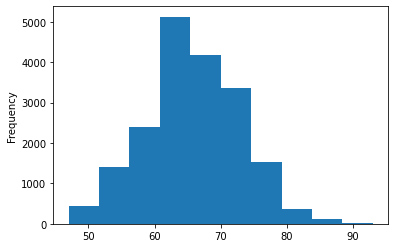

In [ ]:
data_21['overall'].plot.hist()

#**Step 2: Feature subsets**


---



#### Checking correlation of each column against the target variable (overall)

In [ ]:
corr = data_21.corr()['overall']

print(corr.sort_values())

sofifa_id             -0.486575
work_rate             -0.233214
club_position         -0.227891
league_level          -0.217769
club_team_id          -0.211586
                         ...   
potential              0.636366
passing                0.660281
mentality_composure    0.705252
movement_reactions     0.867234
overall                1.000000
Name: overall, Length: 95, dtype: float64


#### Using SelectKBest to select the features that show max correlation with the dependent variable (overall)

In [ ]:
X = data_21.drop(['overall'], axis=1)
y = data_21['overall']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Use SelectKBest to select the 20 best features using f_regression
selector = SelectKBest(f_regression, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the names of the selected features
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

Index(['sofifa_id', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
       'passing', 'dribbling', 'physic', 'attacking_short_passing',
       'skill_long_passing', 'movement_reactions', 'power_shot_power',
       'mentality_vision', 'mentality_composure', 'lam', 'cam', 'ram', 'lcm',
       'cm', 'rcm'],
      dtype='object')


#**Step 3: Create and train machine learning model**


---



In [ ]:
# Evaluate the models on the testing set
X_test_selected = selector.transform(X_test)

#### Create and train model using xgboost

In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X_train_selected, y_train)

# Predict the test set
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
X_test_selected = selector.transform(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.07%


#### Create and train model using random forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

y_pred = rf_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean squared error: ', mse)


# mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:}')
print(f'Mean Squared Error: {mse:.2f}')

Mean squared error:  0.8688272631301134
Mean Absolute Error: 0.5194589601477964
Mean Squared Error: 0.87


In [ ]:
y_predresults = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
y_predresults.head(20)

,Actual,Predicted
15024,60,59.84
11771,64,63.98
16615,58,57.52
4201,71,70.89
13480,62,61.96
5028,70,69.87
16743,57,56.83
3268,72,71.41
3482,72,72.44
4125,71,70.47


#**Step 4: Optimisation**


---

_The random forest model had higher accuracy than the xgboost model, hence we went ahead to optimise the random forest model_


In [ ]:
# Fine-tune the model using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
   'max_features': [1.0,'sqrt'],
    'max_depth' : [None, 6, 8],
    'criterion' :['squared_error']
}

grid_rf = GridSearchCV(rf_model, param_grid, cv=2)
grid_rf.fit(X_train_selected, y_train)

# Make predictions on the testing dataset using the fine-tuned model
y_pred_tuned = grid_rf.predict(X_test_selected)

# Evaluate the performance of the fine-tuned model using Mean Squared Error and R-squared
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
mae = mean_absolute_error(y_test, y_pred_tuned)
print(f'Mean Absolute Error: {mae:}')
print("Tuned Mean Squared Error:", mse_tuned)
print("Tuned R-squared:", r2_tuned)

Mean Absolute Error: 0.5189707046714171
Tuned Mean Squared Error: 0.891797489809683
Tuned R-squared: 0.9810799198221644


In [ ]:
print(grid_rf.best_params_)

{'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'n_estimators': 300}


Refitting the random forest model using the features than ensure an optimised model as generated by the grid search

In [ ]:
op_model = RandomForestRegressor(n_estimators=300, random_state=42)
op_model.fit(X_train_selected, y_train)

y_pred = op_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean squared error: ', mse)


# mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:}')
print(f'Mean Squared Error: {mse:.2f}')

Mean squared error:  0.891797489809683
Mean Absolute Error: 0.5189707046714171
Mean Squared Error: 0.89


#**Step 5: Use the model on new data**




---
_Using players_22 dataset_


#### **Understanding the dataset**

Viewing the number of rows and columns, checking the type of data in each column and viewing the dataset contents to understand how the data in each column currently looks like.

In [ ]:
data_22.shape

(19239, 110)

In [ ]:
data_22.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 110 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    sofifa_id                    19239 non-null  int64  
 1    player_url                   19239 non-null  object 
 2    short_name                   19239 non-null  object 
 3    long_name                    19239 non-null  object 
 4    player_positions             19239 non-null  object 
 5    overall                      19239 non-null  int64  
 6    potential                    19239 non-null  int64  
 7    value_eur                    19165 non-null  float64
 8    wage_eur                     19178 non-null  float64
 9    age                          19239 non-null  int64  
 10   dob                          19239 non-null  object 
 11   height_cm                    19239 non-null  int64  
 12   weight_kg                    19239 non-null  int64  
 13  

In [ ]:
data_22.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


#### **Preparing the dataset**

In [ ]:
# drop columns that are clearly irrelevant to the model upon observation
data_22 = drop_cols(data_22)

In [ ]:
data_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   long_name                    19239 non-null  object 
 2   player_positions             19239 non-null  object 
 3   overall                      19239 non-null  int64  
 4   potential                    19239 non-null  int64  
 5   value_eur                    19165 non-null  float64
 6   wage_eur                     19178 non-null  float64
 7   age                          19239 non-null  int64  
 8   height_cm                    19239 non-null  int64  
 9   weight_kg                    19239 non-null  int64  
 10  club_team_id                 19178 non-null  float64
 11  club_name                    19178 non-null  object 
 12  league_name                  19178 non-null  object 
 13  league_level    

In [ ]:
# Fill in missing values using SimpleImputer.
data_22 = input_missing_values(data_22)

In [ ]:
data_22.head()

,sofifa_id,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,2021-08-10,2023.0,52,Argentina,1369.0,Left,4,4,5,Medium/Low,Unique,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,36.0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,2014-07-01,2023.0,37,Poland,1353.0,Right,4,4,5,High/Medium,Unique,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,36.0,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,2021-08-27,2023.0,38,Portugal,1354.0,Right,4,5,5,High/Low,Unique,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,36.0,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,2017-08-03,2025.0,54,Brazil,1357.0,Right,5,5,5,High/Medium,Unique,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,36.0,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,2015-08-30,2025.0,7,Belgium,1325.0,Right,5,4,4,High/High,Unique,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,36.0,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [ ]:
data_22[data_22.columns[68:95]].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [ ]:
# convert positions columns to integers
data_22 = convert_to_int(data_22)

In [ ]:
data_22[data_22.columns[68:95]].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22
1,92,92,92,85,88,88,88,85,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22
2,91,91,91,88,89,89,89,88,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23
3,86,86,86,90,88,88,88,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23
4,86,86,86,88,87,87,87,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24


In [ ]:
# scaling numerical data
data_22 = scale(data_22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  float64
 1   potential                    19239 non-null  float64
 2   value_eur                    19239 non-null  float64
 3   wage_eur                     19239 non-null  float64
 4   age                          19239 non-null  float64
 5   height_cm                    19239 non-null  float64
 6   weight_kg                    19239 non-null  float64
 7   club_team_id                 19239 non-null  float64
 8   league_level                 19239 non-null  float64
 9   club_contract_valid_until    19239 non-null  float64
 10  nationality_id               19239 non-null  float64
 11  nation_team_id               19239 non-null  float64
 12  weak_foot                    19239 non-null  float64
 13  skill_moves     

In [ ]:
# encoding categorical data 
data_22 = encode_data(data_22)

<AxesSubplot:ylabel='Frequency'>

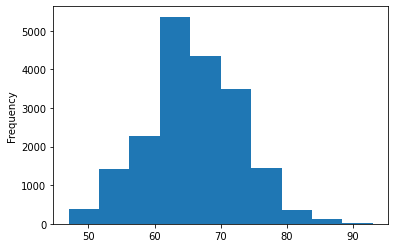

In [ ]:
data_22['overall'].plot.hist()

In [ ]:
data_22.head()

,sofifa_id,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_contract_valid_until,nationality_id,nation_team_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,long_name,player_positions,overall,club_name,league_name,club_position,club_joined,nationality_name,preferred_foot,work_rate,body_type
0,-2.716263,3.60178,9.889397,15.996581,1.851089,-1.646467,-0.416315,-0.925902,-0.472927,0.196717,-0.131273,-0.067765,1.569295,2.146241,10.525295,9.589016,1.619408,2.976726,3.539198,3.542596,-1.186251,0.005012,1.964190,2.490076,1.053337,2.217457,2.579532,2.147538,2.515375,3.012606,2.524112,2.252136,1.737133,1.021387,1.850364,3.599846,2.159347,2.139433,0.262854,0.552196,0.315265,2.439705,-0.679892,-0.319857,2.174690,3.006228,1.721270,3.131025,-1.316900,-0.614426,-1.055483,-0.592145,-0.308358,-0.063713,-0.130678,-0.474818,-0.013615,2.629268,2.629268,2.629268,2.479878,2.628108,2.628108,2.628108,2.479878,2.523474,2.523474,2.523474,2.475498,2.479075,2.479075,2.479075,2.475498,0.929156,0.813047,0.813047,0.813047,0.929156,0.604540,-0.090851,-0.090851,-0.090851,0.604540,-0.083997,10421,604,93,470,19,25,1808,6,0,7,9
1,-1.587450,3.43747,15.350116,13.424792,1.429869,0.539166,0.856805,-0.926858,-0.472927,0.196717,-0.429500,-0.069908,1.569295,2.146241,10.525295,13.234253,0.940603,2.976726,2.275622,2.554865,-0.533738,1.844734,1.187887,2.490076,2.209825,1.803392,2.636180,1.561936,1.745324,2.488684,1.126551,1.772039,0.814077,0.954565,0.908358,3.489252,1.251806,2.442649,1.665187,0.799952,1.657738,2.079086,1.500202,0.115418,2.276621,1.980597,2.672553,2.473077,-0.574336,-0.284737,-1.296387,-0.080012,-0.605286,-0.244828,-0.482391,-0.362988,-0.013615,2.629268,2.629268,2.629268,2.002035,2.277228,2.277228,2.277228,2.002035,2.237008,2.237008,2.237008,2.047400,1.950475,1.950475,1.950475,2.047400,0.784576,0.957209,0.957209,0.957209,0.784576,0.604540,0.589974,0.589974,0.589974,0.604540,-0.083997,14882,635,92,241,21,27,210,123,1,2,9
2,-7.791226,3.27316,5.547138,13.424792,2.272309,0.830584,1.139720,-0.927042,-0.472927,0.196717,-0.409618,-0.069774,1.569295,3.448937,10.525295,5.385624,1.813352,3.127556,2.380920,2.774360,-1.186251,1.087202,2.075090,2.490076,2.209825,1.458338,2.466236,1.721646,1.855332,2.430471,1.592404,1.772039,1.341538,1.555967,1.513933,3.599846,0.693319,2.745866,2.490088,0.861892,0.947017,2.388188,0.439616,-0.851861,2.276621,1.614300,2.545715,3.048782,-1.118883,-0.755721,-1.055483,-0.535241,-0.308358,-0.063713,-0.130678,-0.307073,-0.013615,2.555084,2.555084,2.555084,2.206824,2.347404,2.347404,2.347404,2.206824,2.237008,2.237008,2.237008,2.190100,1.799447,1.799447,1.799447,2.190100,0.712286,0.452642,0.452642,0.452642,0.712286,0.533486,0.113397,0.113397,0.113397,0.533486,-0.017653,3379,658,91,412,17,27,1825,124,1,1,9
3,-1.501426,3.27316,16.600160,13.424792,0.798039,-0.917923,-0.982145,-0.925902,-0.472927,1.846872,-0.091510,-0.069372,3.058403,3.448937,10.525295,16.093937,2.201240,2.297992,3.012708,3.432848,-0.990497,-0.211426,1.964190,1.881572,0.648566,1.872403,2.466236,2.094301,2.240357,2.605111,1.858606,2.192124,1.868998,1.622789,2.186795,3.046874,1.391428,1.684607,-0.067106,1.109649

In [ ]:
X = data_22.drop(['overall'], axis=1)
X_data_22 = selector.transform(X)


y = data_22['overall']

test_pred = op_model.predict(X_data_22)

mse = mean_squared_error(y, test_pred)
mae = mean_absolute_error(y, test_pred)
print('Mean squared error: ', mse)
# rmse = np.sqrt(mse)
# r2 = r2_score(y, test_pred)
print(f'Mean Absolute Error: {mae:}')
print(f'Mean Squared Error: {mse:.2f}')

Mean squared error:  3.0611848346241146
Mean Absolute Error: 1.1023169949928096
Mean Squared Error: 3.06


In [ ]:
test_predresults = pd.DataFrame({'Actual': y, 'Predicted': test_pred})

In [ ]:
test_predresults.head(20)

,Actual,Predicted
0,93,89.840000
1,92,90.330000
2,91,89.090000
3,91,90.363333
4,91,90.646667
5,91,90.130000
6,91,89.826667
7,90,84.800000
8,90,89.190000
9,90,89.710000


In [ ]:
import joblib

joblib.dump(op_model,'my_model.joblib')


['my_model.joblib']

In [ ]:
from google.colab import files 
files.download('my_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor
with open('op_model.pkl', 'wb') as file:
  pickle.dump(op_model, file)



In [ ]:
files.download('op_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>